In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# import data
file = "data/CPITimeSeries.csv"
df = pd.read_csv(file)

C:\Users\Miguel Galvão\AppData\Local\Temp\ipykernel_11260\1134312429.py:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [83]:
# drop unnecessary years
year_month = []
for i in range(40):
    for j in range(12):
        pr = f'19{50+i}M{j+1}'
        year_month.append(pr)

df.drop(year_month, axis=1, inplace=True)

# select country data
country = "Netherlands, The"

country_data = df[(df['Country Name'] == country) & (df['Indicator Code'] == 'PCPI_IX') & (df['Attribute'] == 'Value')]

# Extract CPI information
country_cpi_data = country_data.iloc[0, 5:-2].to_numpy(dtype=np.float64)
country_cpi_data = pd.Series(data=country_cpi_data, index=np.arange(len(country_cpi_data)))

print("Done")

Done


C:\Users\Miguel Galvão\AppData\Local\Temp\ipykernel_11260\2870197012.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


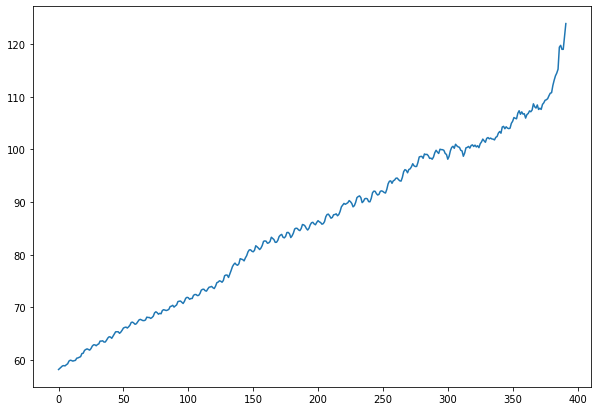

In [84]:
# plot time series
y = country_cpi_data
x = np.arange(len(y))

f = plt.figure(figsize=(10,7))
plt.plot(x, y)
f.show()